# Sprawozdanie z laboratorium 5
### Maria Kędzierska 305704

## Opis tematu
Tematem laboratorium było dodanie różnych funkcji aktywacji i sprawdzenie ich działania.

## Opis wykonanej pracy


## Wnioski i przeprowadzone eksperymenty

`Linear`:
  - Zastosowanie wyłącznie aktywacji liniowej sprawiło, że sieć przy żadnej konfiguracji parametrów nie chciała się uczyć. Zwiększanie learning rate powodowało występowanie wartości `nan`. Z kolei przy małym `learning rate` sieć nie była w stanie się nauczyć.

`Tanh`:
  - Nie radził sobie przy dużym batch size(np. 64).
  - Najszybciej wytrenował się na architekturze z dwoma warstwami.
  - Średni czas trenowania był trochę krótszy niż dla sigmoid.

`ReLU`:
  - Nie radzi sobie najlepiej w płytkich architekturach.

Najlepszym wyborem wydaje się funkcja aktywacji `tanh` i architektura nr 2, czyli z dwoma warstwami ukrytymi.

W przypadku obu zbiorów do klasyfikacji lepsza okazała się funkcja aktywacji ReLU, ponieważ dokładniej się wytrenowała w krótszym czasie.

In [58]:
results_df

,MSE - Architecture1,MSE - Architecture2,MSE - Architecture3
Sigmoid,4.110139,2.716526,4.394352
Linear,4451.092939,4435.309949,4433.899366
Tanh,3.604852,1.838249,2.904747
ReLU,223.728862,2.493991,2.588956


In [18]:
import os
import matplotlib.pyplot as plt
import pandas as pd

from network import NN
from activation_functions import *
from metrics import *
from prepare_data import read_classification_data, read_regression_data
os.chdir('..')

In [7]:
def plot_results(x, y_true, y_preds):
    plt.figure(figsize=[16, 4])
    plt.subplot(141)
    plt.scatter(x, y_true)
    plt.title('Oryginalne dane')
    plt.subplot(142)
    plt.scatter(x, y_preds[0])
    plt.title('Architektura 1')
    plt.subplot(143)
    plt.scatter(x, y_preds[1])
    plt.title('Architektura 2')
    plt.subplot(144)
    plt.scatter(x, y_preds[2])
    plt.title('Architektura 3')
    plt.show()


## Testy na zbiorze multimodal

In [2]:
m_x_train, m_y_train, m_x_test, m_y_test = read_regression_data('multimodal-large', index_col=None)

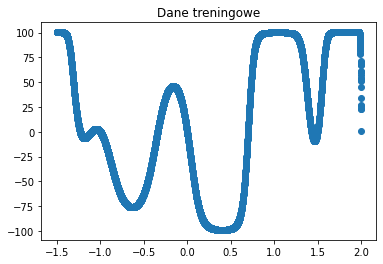

In [3]:
plt.scatter(m_x_train, m_y_train)
plt.title('Dane treningowe')
plt.show()

In [19]:
architecture1 = [32, 1]
architecture2 = [40, 40, 1]
architecture3 = [32, 32, 16, 1]
results_df = pd.DataFrame(columns=['MSE - Architecture1', 'MSE - Architecture2', 'MSE - Architecture3'])

### Sigmoid

In [5]:
nn_sig_a1 = NN(input_shape=m_x_train.shape, neurons_num=architecture1, activations=[Sigmoid(), Linear()])
nn_sig_a1.fit(m_x_train, m_y_train, batch_size=64, n_epochs=200, learning_rate=0.0003, loss=mse, metric=mse, x_test=m_x_test, y_test=m_y_test, verbose_step=10)

Epoch number 10/200
Loss on training set: 904.5317652201587, loss on test set: 963.1374545795996
Epoch number 20/200
Loss on training set: 314.3438277953491, loss on test set: 340.7097909380177
Epoch number 30/200
Loss on training set: 134.67139487581983, loss on test set: 146.14875107669843
Epoch number 40/200
Loss on training set: 70.82927856405264, loss on test set: 73.98928889550984
Epoch number 50/200
Loss on training set: 40.81684557836747, loss on test set: 40.256178407236476
Epoch number 60/200
Loss on training set: 27.869742400689958, loss on test set: 25.134282820144726
Epoch number 70/200
Loss on training set: 20.673382093991172, loss on test set: 16.688622977586448
Epoch number 80/200
Loss on training set: 16.924668697898017, loss on test set: 13.03733503235302
Epoch number 90/200
Loss on training set: 14.760174679914094, loss on test set: 10.123190179351944
Epoch number 100/200
Loss on training set: 13.425118951636351, loss on test set: 8.708886814582533
Epoch number 110/2

In [14]:
nn_sig_a2 = NN(input_shape=m_x_train.shape, neurons_num=architecture2, activations=[Sigmoid(), Sigmoid(), Linear()], seed=123)
nn_sig_a2.fit(m_x_train, m_y_train, batch_size=4, n_epochs=100, learning_rate=0.0003, loss=mse, metric=mse, x_test=m_x_test, y_test=m_y_test, verbose_step=10)

Epoch number 10/100
Loss on training set: 727.5600714037492, loss on test set: 792.0082924651646
Epoch number 20/100
Loss on training set: 235.1445823061319, loss on test set: 249.48004014241567
Epoch number 30/100
Loss on training set: 41.37412610211791, loss on test set: 41.94260505103817
Epoch number 40/100
Loss on training set: 17.14923752205668, loss on test set: 15.644599334795869
Epoch number 50/100
Loss on training set: 23.36077262100347, loss on test set: 19.68945781769907
Epoch number 60/100
Loss on training set: 27.77014306959996, loss on test set: 26.510706997736094
Epoch number 70/100
Loss on training set: 19.871054670957452, loss on test set: 20.298128925509904
Epoch number 80/100
Loss on training set: 10.310232566710061, loss on test set: 5.93284231248396
Epoch number 90/100
Loss on training set: 8.806586138297849, loss on test set: 4.234349419362736
Epoch number 100/100
Loss on training set: 7.741475347971821, loss on test set: 2.7165264738731074


In [15]:
nn_sig_a3 = NN(input_shape=m_x_train.shape, neurons_num=architecture3, activations=[Sigmoid(), Sigmoid(), Sigmoid(), Linear()], seed=123)
nn_sig_a3.fit(m_x_train, m_y_train, batch_size=4, n_epochs=400, learning_rate=0.0003, loss=mse, metric=mse, x_test=m_x_test, y_test=m_y_test, verbose_step=10)

Epoch number 10/400
Loss on training set: 1464.5080684052155, loss on test set: 1604.8715968763715
Epoch number 20/400
Loss on training set: 1463.838643893939, loss on test set: 1603.6684590066882
Epoch number 30/400
Loss on training set: 1465.5724509303734, loss on test set: 1609.8205059377535
Epoch number 40/400
Loss on training set: 1471.335172188741, loss on test set: 1611.9831764121657
Epoch number 50/400
Loss on training set: 1462.7397393717365, loss on test set: 1603.049395617275
Epoch number 60/400
Loss on training set: 1420.192320370461, loss on test set: 1563.0109496928792
Epoch number 70/400
Loss on training set: 1310.2303335690542, loss on test set: 1455.3366890115697
Epoch number 80/400
Loss on training set: 1308.8921855619149, loss on test set: 1452.2944588288526
Epoch number 90/400
Loss on training set: 1308.2765179181793, loss on test set: 1451.1022383207448
Epoch number 100/400
Loss on training set: 1308.4722503216183, loss on test set: 1454.5879266831698
Epoch number 

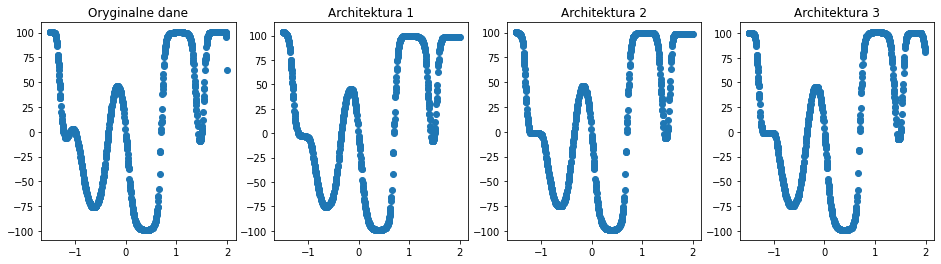

In [21]:
results_sigmoid = [
    nn_sig_a1.predict(m_x_test),
    nn_sig_a2.predict(m_x_test),
    nn_sig_a3.predict(m_x_test)
]
plot_results(m_x_test, y_true=m_y_test, y_preds=results_sigmoid)

In [22]:
results_df.loc['Sigmoid'] = [mse(m_y_test, y_pred) for y_pred in results_sigmoid]

In [23]:
results_df

,MSE - Architecture1,MSE - Architecture2,MSE - Architecture3
Sigmoid,4.110139,2.716526,4.394352


## Funkcja liniowa

In [24]:
nn_lin_a1 = NN(input_shape=m_x_train.shape, neurons_num=architecture1, activations=[Linear(), Linear()])
nn_lin_a1.fit(m_x_train, m_y_train, batch_size=16, n_epochs=200, learning_rate=0.00005, loss=mse, metric=mse, x_test=m_x_test, y_test=m_y_test, verbose_step=10)

Epoch number 10/200
Loss on training set: 4404.060828750284, loss on test set: 4440.916188952203
Epoch number 20/200
Loss on training set: 4401.031211135352, loss on test set: 4436.998494385117
Epoch number 30/200
Loss on training set: 4400.09130102376, loss on test set: 4435.965762596034
Epoch number 40/200
Loss on training set: 4406.118558609109, loss on test set: 4443.356661219535
Epoch number 50/200
Loss on training set: 4398.920208656402, loss on test set: 4434.008968962913
Epoch number 60/200
Loss on training set: 4403.805299590309, loss on test set: 4438.674588141508
Epoch number 70/200
Loss on training set: 4399.8089462771195, loss on test set: 4435.451785204526
Epoch number 80/200
Loss on training set: 4414.316923403125, loss on test set: 4447.167320359512
Epoch number 90/200
Loss on training set: 4409.166066775824, loss on test set: 4442.734897945132
Epoch number 100/200
Loss on training set: 4399.844716843494, loss on test set: 4435.8535953506835
Epoch number 110/200
Loss on

In [28]:
nn_lin_a2 = NN(input_shape=m_x_train.shape, neurons_num=architecture2, activations=[Linear(), Linear(), Linear()])
nn_lin_a2.fit(m_x_train, m_y_train, batch_size=16, n_epochs=100, learning_rate=0.000005, loss=mse, metric=mse, x_test=m_x_test, y_test=m_y_test, verbose_step=10)

Epoch number 10/100
Loss on training set: 4398.43196896934, loss on test set: 4433.749996642748
Epoch number 20/100
Loss on training set: 4402.042852800403, loss on test set: 4438.269329873147
Epoch number 30/100
Loss on training set: 4400.451969685591, loss on test set: 4434.935835797458
Epoch number 40/100
Loss on training set: 4406.413389917155, loss on test set: 4442.157587663181
Epoch number 50/100
Loss on training set: 4401.204089476411, loss on test set: 4437.936531277788
Epoch number 60/100
Loss on training set: 4399.216340123728, loss on test set: 4434.405876707712
Epoch number 70/100
Loss on training set: 4400.637338349437, loss on test set: 4435.40391874132
Epoch number 80/100
Loss on training set: 4401.421084886472, loss on test set: 4438.106363365548
Epoch number 90/100
Loss on training set: 4400.086582892996, loss on test set: 4436.367436020346
Epoch number 100/100
Loss on training set: 4400.925756275608, loss on test set: 4435.309949411204


In [32]:
nn_lin_a3 = NN(input_shape=m_x_train.shape, neurons_num=architecture3, activations=[Linear(), Linear(), Linear(), Linear()])
nn_lin_a3.fit(m_x_train, m_y_train, batch_size=128, n_epochs=200, learning_rate=0.0000003, loss=mse, metric=mse, x_test=m_x_test, y_test=m_y_test, verbose_step=10)

Epoch number 10/200
Loss on training set: 4400.932290518043, loss on test set: 4437.183310384303
Epoch number 20/200
Loss on training set: 4401.508996147339, loss on test set: 4437.902711517302
Epoch number 30/200
Loss on training set: 4399.733645388039, loss on test set: 4434.325596703892
Epoch number 40/200
Loss on training set: 4398.6657733888715, loss on test set: 4433.926942034645
Epoch number 50/200
Loss on training set: 4398.610445352533, loss on test set: 4434.45052590031
Epoch number 60/200
Loss on training set: 4401.200528715253, loss on test set: 4436.281610479442
Epoch number 70/200
Loss on training set: 4398.8278476638125, loss on test set: 4434.858059647394
Epoch number 80/200
Loss on training set: 4399.284057899315, loss on test set: 4435.018516078025
Epoch number 90/200
Loss on training set: 4408.880824729593, loss on test set: 4446.178295679042
Epoch number 100/200
Loss on training set: 4398.998069522578, loss on test set: 4434.400595836639
Epoch number 110/200
Loss on

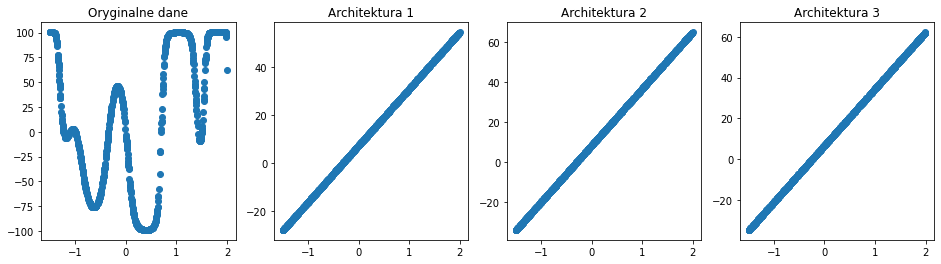

In [49]:
results_linear = [
    nn_lin_a1.predict(m_x_test),
    nn_lin_a2.predict(m_x_test),
    nn_lin_a3.predict(m_x_test)
]
results_df.loc['Linear'] = [mse(m_y_test, y_pred) for y_pred in results_linear]
plot_results(m_x_test, y_true=m_y_test, y_preds=results_linear)

### Tanh

In [42]:
nn_tanh_a1 = NN(input_shape=m_x_train.shape, neurons_num=architecture1,
        activations=[Tanh(), Linear()])

nn_tanh_a1.fit(m_x_train, m_y_train, batch_size=4, n_epochs=60, learning_rate=0.0003, loss=mse, metric=mse, x_test=m_x_test, y_test=m_y_test, verbose_step=10)
nn_tanh_a1.fit(m_x_train, m_y_train, batch_size=4, n_epochs=100, learning_rate=0.00003, loss=mse, metric=mse, x_test=m_x_test, y_test=m_y_test, verbose_step=10)

Epoch number 10/60
Loss on training set: 303.8972311050679, loss on test set: 335.20620318930287
Epoch number 20/60
Loss on training set: 290.35376321600785, loss on test set: 323.77530132798523
Epoch number 30/60
Loss on training set: 224.57037730161255, loss on test set: 246.12693481590674
Epoch number 40/60
Loss on training set: 20.309994002698545, loss on test set: 19.068193609446002
Epoch number 50/60
Loss on training set: 12.932080956093058, loss on test set: 9.252190170135153
Epoch number 60/60
Loss on training set: 10.086350390548464, loss on test set: 5.35484187438825
Epoch number 10/100
Loss on training set: 8.850072744135174, loss on test set: 4.15143962559651
Epoch number 20/100
Loss on training set: 8.801158479723211, loss on test set: 4.133578219246072
Epoch number 30/100
Loss on training set: 8.756814704807427, loss on test set: 3.9800424314725777
Epoch number 40/100
Loss on training set: 8.689284711545229, loss on test set: 3.977922014608671
Epoch number 50/100
Loss on 

In [40]:
nn_tanh_a2 = NN(input_shape=m_x_train.shape, neurons_num=architecture2,
        activations=[Tanh(), Tanh(), Linear()])

nn_tanh_a2.fit(m_x_train, m_y_train, batch_size=4, n_epochs=100, learning_rate=0.0001, loss=mse, metric=mse, x_test=m_x_test, y_test=m_y_test, verbose_step=10)

Epoch number 10/100
Loss on training set: 283.66827995491394, loss on test set: 296.0937929060203
Epoch number 20/100
Loss on training set: 25.25027207670351, loss on test set: 23.871443556600457
Epoch number 30/100
Loss on training set: 7.2843889758355, loss on test set: 3.70523691906807
Epoch number 40/100
Loss on training set: 6.76479062897034, loss on test set: 2.726704496113855
Epoch number 50/100
Loss on training set: 7.639122012520944, loss on test set: 4.492212550774702
Epoch number 60/100
Loss on training set: 5.740832876835219, loss on test set: 2.4296132221140327
Epoch number 70/100
Loss on training set: 5.928090923859366, loss on test set: 3.358341439014643
Epoch number 80/100
Loss on training set: 6.163513483188511, loss on test set: 3.0917389506921693
Epoch number 90/100
Loss on training set: 5.719038670076367, loss on test set: 2.364984994994672
Epoch number 100/100
Loss on training set: 5.708215102951527, loss on test set: 1.8382492541747801


In [46]:
nn_tanh_a3 = NN(input_shape=m_x_train.shape, neurons_num=architecture3,
        activations=[Tanh(), Tanh(), Tanh(), Linear()])

nn_tanh_a3.fit(m_x_train, m_y_train, batch_size=4, n_epochs=160, learning_rate=0.00003, loss=mse, metric=mse, x_test=m_x_test, y_test=m_y_test, verbose_step=10)

Epoch number 10/160
Loss on training set: 366.0247685541147, loss on test set: 410.0183019525544
Epoch number 20/160
Loss on training set: 293.64019073610154, loss on test set: 328.9670853027463
Epoch number 30/160
Loss on training set: 289.6714508565443, loss on test set: 322.9609162767427
Epoch number 40/160
Loss on training set: 288.60154699618073, loss on test set: 321.29560472786636
Epoch number 50/160
Loss on training set: 289.524147936158, loss on test set: 322.1331230555659
Epoch number 60/160
Loss on training set: 129.79762657727736, loss on test set: 146.66779394010018
Epoch number 70/160
Loss on training set: 61.289156595150345, loss on test set: 68.67090048181934
Epoch number 80/160
Loss on training set: 39.143918698240796, loss on test set: 40.8587939792992
Epoch number 90/160
Loss on training set: 18.354955898685827, loss on test set: 18.005429834237116
Epoch number 100/160
Loss on training set: 16.555544089418092, loss on test set: 17.033541402744284
Epoch number 110/160

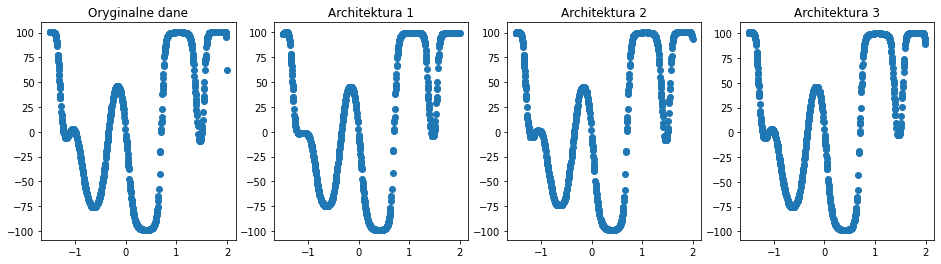

In [48]:
results_tanh = [
    nn_tanh_a1.predict(m_x_test),
    nn_tanh_a2.predict(m_x_test),
    nn_tanh_a3.predict(m_x_test)
]
results_df.loc['Tanh'] = [mse(m_y_test, y_pred) for y_pred in results_tanh]
plot_results(m_x_test, y_true=m_y_test, y_preds=results_tanh)

### ReLU

In [53]:
nn_relu_a1 = NN(input_shape=m_x_train.shape, neurons_num=architecture1,
        activations=[ReLU(), Linear()])

nn_relu_a1.fit(m_x_train, m_y_train, batch_size=4, n_epochs=40, learning_rate=0.0001, loss=mse, metric=mse, x_test=m_x_test, y_test=m_y_test, verbose_step=10)
nn_relu_a1.fit(m_x_train, m_y_train, batch_size=4, n_epochs=160, learning_rate=0.00001, loss=mse, metric=mse, x_test=m_x_test, y_test=m_y_test, verbose_step=10)

Epoch number 10/40
Loss on training set: 695.1867201710977, loss on test set: 724.4135233693669
Epoch number 20/40
Loss on training set: 856.8484066991167, loss on test set: 910.8274064050142
Epoch number 30/40
Loss on training set: 608.163962282488, loss on test set: 630.3684319342813
Epoch number 40/40
Loss on training set: 369.05886626414696, loss on test set: 392.71436045245866
Epoch number 10/160
Loss on training set: 298.30956436076394, loss on test set: 321.83473273167164
Epoch number 20/160
Loss on training set: 264.0249716453294, loss on test set: 279.9243552035625
Epoch number 30/160
Loss on training set: 241.62861355555378, loss on test set: 257.2008491213833
Epoch number 40/160
Loss on training set: 261.55264998586034, loss on test set: 274.4690674107543
Epoch number 50/160
Loss on training set: 225.44463814766527, loss on test set: 239.9824167462034
Epoch number 60/160
Loss on training set: 222.87120732178417, loss on test set: 239.3377570382561
Epoch number 70/160
Loss on

In [55]:
nn_relu_a2 = NN(input_shape=m_x_train.shape, neurons_num=architecture2,
        activations=[ReLU(), ReLU(), Linear()])

nn_relu_a2.fit(m_x_train, m_y_train, batch_size=4, n_epochs=40, learning_rate=0.0001, loss=mse, metric=mse, x_test=m_x_test, y_test=m_y_test, verbose_step=10)
nn_relu_a2.fit(m_x_train, m_y_train, batch_size=4, n_epochs=50, learning_rate=0.00005, loss=mse, metric=mse, x_test=m_x_test, y_test=m_y_test, verbose_step=10)

Epoch number 50/50
Loss on training set: 5.728726857730694, loss on test set: 2.493991162982777
Epoch number 10/40
Loss on training set: 132.072572184014, loss on test set: 138.5604252334451
Epoch number 20/40
Loss on training set: 97.46957290594642, loss on test set: 101.59103108738026
Epoch number 30/40
Loss on training set: 57.21064238399209, loss on test set: 66.95835728591454
Epoch number 40/40
Loss on training set: 49.97394217280023, loss on test set: 54.79102722218631
Epoch number 10/50
Loss on training set: 6.9137743080320595, loss on test set: 2.515306275513172
Epoch number 20/50
Loss on training set: 7.7225222725920295, loss on test set: 3.879005025647319
Epoch number 30/50
Loss on training set: 6.822460163657047, loss on test set: 2.740828393221087
Epoch number 40/50
Loss on training set: 6.308069983877567, loss on test set: 2.394865131000879
Epoch number 50/50
Loss on training set: 5.728726857730694, loss on test set: 2.493991162982777


In [56]:
nn_relu_a3 = NN(input_shape=m_x_train.shape, neurons_num=architecture3,
        activations=[ReLU(), ReLU(), ReLU(), Linear()])

nn_relu_a3.fit(m_x_train, m_y_train, batch_size=4, n_epochs=90, learning_rate=0.00001, loss=mse, metric=mse, x_test=m_x_test, y_test=m_y_test, verbose_step=10)

Epoch number 10/90
Loss on training set: 218.46728353571058, loss on test set: 203.01789104695058
Epoch number 20/90
Loss on training set: 26.41786611661307, loss on test set: 20.035822925718698
Epoch number 30/90
Loss on training set: 11.103440814860972, loss on test set: 7.089151836369851
Epoch number 40/90
Loss on training set: 8.96437911368479, loss on test set: 4.395906915794382
Epoch number 50/90
Loss on training set: 10.630294431957006, loss on test set: 7.297089709015912
Epoch number 60/90
Loss on training set: 7.684051022476876, loss on test set: 3.6440436150940605
Epoch number 70/90
Loss on training set: 8.701651260684171, loss on test set: 5.165070477474818
Epoch number 80/90
Loss on training set: 10.825517290425587, loss on test set: 6.29081900964099
Epoch number 90/90
Loss on training set: 6.883387828144114, loss on test set: 2.588955901325747


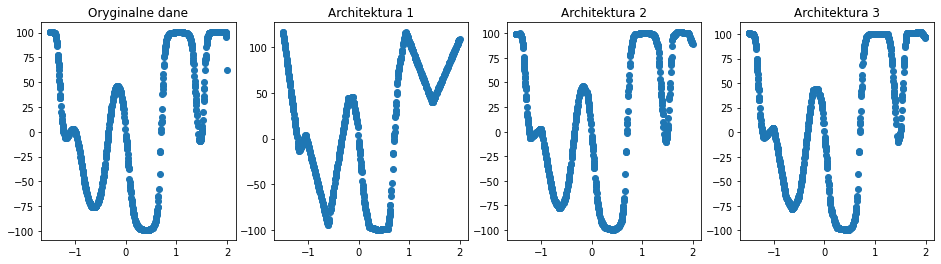

In [57]:
results_relu = [
    nn_relu_a1.predict(m_x_test),
    nn_relu_a2.predict(m_x_test),
    nn_relu_a3.predict(m_x_test)
]
results_df.loc['ReLU'] = [mse(m_y_test, y_pred) for y_pred in results_relu]
plot_results(m_x_test, y_true=m_y_test, y_preds=results_relu)

## Steps-large

In [59]:
sl_x_train, sl_y_train, sl_x_test, sl_y_test = read_regression_data('steps-large')

In [63]:
nn_tanh_sl = NN(input_shape=m_x_train.shape, neurons_num=architecture2,
        activations=[Tanh(), Tanh(), Linear()])

nn_tanh_sl.fit(sl_x_train, sl_y_train, batch_size=4, n_epochs=100, learning_rate=0.0001, loss=mse, metric=mse, x_test=sl_x_test, y_test=sl_y_test, verbose_step=10)
nn_tanh_sl.fit(sl_x_train, sl_y_train, batch_size=4, n_epochs=100, learning_rate=0.00005, loss=mse, metric=mse, x_test=sl_x_test, y_test=sl_y_test, verbose_step=10)

Epoch number 10/100
Loss on training set: 93.01812246325075, loss on test set: 136.51373916326193
Epoch number 20/100
Loss on training set: 63.172845561957985, loss on test set: 37.94866725902171
Epoch number 30/100
Loss on training set: 59.48137403208397, loss on test set: 39.41573519878685
Epoch number 40/100
Loss on training set: 72.95230868225458, loss on test set: 43.86158426393679
Epoch number 50/100
Loss on training set: 35.32361414136819, loss on test set: 26.553792663049265
Epoch number 60/100
Loss on training set: 64.13921424697021, loss on test set: 70.42094112215572
Epoch number 70/100
Loss on training set: 55.909492105857495, loss on test set: 86.26631140532437
Epoch number 80/100
Loss on training set: 32.02110588175945, loss on test set: 28.166087020073945
Epoch number 90/100
Loss on training set: 38.07165398073117, loss on test set: 16.378657602333337
Epoch number 100/100
Loss on training set: 41.99590010618616, loss on test set: 57.5805613668234
Epoch number 10/100
Loss

In [64]:
nn_tanh_sl.fit(sl_x_train, sl_y_train, batch_size=4, n_epochs=100, learning_rate=0.00001, loss=mse, metric=mse, x_test=sl_x_test, y_test=sl_y_test, verbose_step=10)

Epoch number 10/100
Loss on training set: 7.571762444431396, loss on test set: 5.10354553457166
Epoch number 20/100
Loss on training set: 7.361880024121275, loss on test set: 6.529428712270018
Epoch number 30/100
Loss on training set: 8.075099533509986, loss on test set: 6.969587780545772
Epoch number 40/100
Loss on training set: 8.567604381594954, loss on test set: 8.7004759122941
Epoch number 50/100
Loss on training set: 6.801895802926336, loss on test set: 5.748196069078288
Epoch number 60/100
Loss on training set: 7.244994142798063, loss on test set: 5.335473300717884
Epoch number 70/100
Loss on training set: 10.536621717735521, loss on test set: 11.48336950686527
Epoch number 80/100
Loss on training set: 9.259665258593465, loss on test set: 5.174094615004905
Epoch number 90/100
Loss on training set: 11.12392695012136, loss on test set: 6.4259520354628785
Epoch number 100/100
Loss on training set: 6.705447589723927, loss on test set: 6.9747818279768


In [65]:
nn_relu_sl = NN(input_shape=sl_x_train.shape, neurons_num=architecture2,
        activations=[ReLU(), ReLU(), Linear()])

nn_relu_sl.fit(sl_x_train, sl_y_train, batch_size=4, n_epochs=40, learning_rate=0.0001, loss=mse, metric=mse, x_test=sl_x_test, y_test=sl_y_test, verbose_step=10)
nn_relu_sl.fit(sl_x_train, sl_y_train, batch_size=4, n_epochs=100, learning_rate=0.00005, loss=mse, metric=mse, x_test=sl_x_test, y_test=sl_y_test, verbose_step=10)

Epoch number 10/40
Loss on training set: 215.81291915507717, loss on test set: 246.3957951391854
Epoch number 20/40
Loss on training set: 70.26810169510203, loss on test set: 76.21894607390861
Epoch number 30/40
Loss on training set: 65.50439261356196, loss on test set: 56.75622204121818
Epoch number 40/40
Loss on training set: 141.340097213111, loss on test set: 101.50476701275078
Epoch number 10/100
Loss on training set: 44.115976023100416, loss on test set: 45.61761073352204
Epoch number 20/100
Loss on training set: 57.29239169439997, loss on test set: 67.49752272638713
Epoch number 30/100
Loss on training set: 27.888867266831024, loss on test set: 23.540652162950245
Epoch number 40/100
Loss on training set: 51.27129331234256, loss on test set: 62.95540492335921
Epoch number 50/100
Loss on training set: 23.9722886831996, loss on test set: 13.865191191029146
Epoch number 60/100
Loss on training set: 34.297354057063146, loss on test set: 32.182697102745685
Epoch number 70/100
Loss on 

In [66]:
nn_relu_sl.fit(sl_x_train, sl_y_train, batch_size=4, n_epochs=100, learning_rate=0.00001, loss=mse, metric=mse, x_test=sl_x_test, y_test=sl_y_test, verbose_step=10)

Epoch number 10/100
Loss on training set: 18.333131179036332, loss on test set: 13.655165218900036
Epoch number 20/100
Loss on training set: 18.74499000248118, loss on test set: 17.645102005577037
Epoch number 30/100
Loss on training set: 16.17709789772178, loss on test set: 9.112654024698056
Epoch number 40/100
Loss on training set: 14.720653808535937, loss on test set: 13.583104826728086
Epoch number 50/100
Loss on training set: 16.731657744083986, loss on test set: 16.48936276237329
Epoch number 60/100
Loss on training set: 13.345144019306739, loss on test set: 11.811781140235334
Epoch number 70/100
Loss on training set: 13.078049561193724, loss on test set: 7.547351214553384
Epoch number 80/100
Loss on training set: 13.537153643832065, loss on test set: 11.89179114433336
Epoch number 90/100
Loss on training set: 12.79004905637087, loss on test set: 8.613956793129883
Epoch number 100/100
Loss on training set: 10.823296944687876, loss on test set: 8.91869682917628


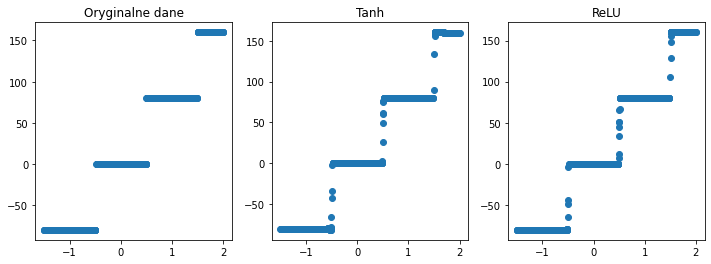

In [68]:
sl_preds = [nn_tanh_sl.predict(sl_x_test), nn_relu_sl.predict(sl_x_test)]
plt.figure(figsize=[12, 4])
plt.subplot(131)
plt.scatter(sl_x_test, sl_y_test)
plt.title('Oryginalne dane')
plt.subplot(132)
plt.scatter(sl_x_test, sl_preds[0])
plt.title('Tanh')
plt.subplot(133)
plt.scatter(sl_x_test, sl_preds[1])
plt.title('ReLU')
plt.show()

## Rings3-regular

In [72]:
architecture_cls = [40, 40, 3]

In [73]:
r3_x_train, r3_y_train, r3_x_test, r3_y_test = read_classification_data('rings3-regular')

In [84]:
nn_tanh_r3 = NN(input_shape=r3_x_train.shape, neurons_num=architecture_cls,
        activations=[Tanh(), Tanh(), Softmax()])

nn_tanh_r3.fit(r3_x_train, r3_y_train, batch_size=4, n_epochs=400, learning_rate=0.0001, loss=cross_entropy, metric=f_score, x_test=r3_x_test, y_test=r3_y_test, verbose_step=10)

Epoch number 10/400
Loss on training set: 0.5960198360826376 f_score on training set: 0.5156345315283172, loss on test set: 0.6011636747949948 f_score on test set: 0.517742295584309
Epoch number 20/400
Loss on training set: 0.554130180157458 f_score on training set: 0.5444218382796561, loss on test set: 0.5639858545575637 f_score on test set: 0.5396189739686261
Epoch number 30/400
Loss on training set: 0.5379669141831227 f_score on training set: 0.55806348063523, loss on test set: 0.5513142954294042 f_score on test set: 0.5656095761065372
Epoch number 40/400
Loss on training set: 0.5251712586383168 f_score on training set: 0.5878127625392161, loss on test set: 0.5386203369334052 f_score on test set: 0.5869917538937449
Epoch number 50/400
Loss on training set: 0.5153769671744292 f_score on training set: 0.6159728676550612, loss on test set: 0.534505971640192 f_score on test set: 0.5922897778627979
Epoch number 60/400
Loss on training set: 0.5120193873463005 f_score on training set: 0.60

In [86]:
nn_relu_r3 = NN(input_shape=r3_x_train.shape, neurons_num=architecture_cls,
        activations=[ReLU(), ReLU(), Softmax()])

nn_relu_r3.fit(r3_x_train, r3_y_train, batch_size=4, n_epochs=400, learning_rate=0.0001, loss=cross_entropy, metric=f_score, x_test=r3_x_test, y_test=r3_y_test, verbose_step=10)

Epoch number 10/400
Loss on training set: 0.8166101360600547 f_score on training set: 0.592727136745189, loss on test set: 0.9526143981637117 f_score on test set: 0.5441598735655321
Epoch number 20/400
Loss on training set: 0.5661737990487267 f_score on training set: 0.5883753944135457, loss on test set: 0.6537660598661512 f_score on test set: 0.545441615343052
Epoch number 30/400
Loss on training set: 0.4782224189716229 f_score on training set: 0.6722051862612529, loss on test set: 0.5072337133305997 f_score on test set: 0.6836438418079097
Epoch number 40/400
Loss on training set: 0.38843389411704526 f_score on training set: 0.7418509062887324, loss on test set: 0.39674410272544186 f_score on test set: 0.7390978703357792
Epoch number 50/400
Loss on training set: 0.37363588812042875 f_score on training set: 0.7105685479940846, loss on test set: 0.4380418732941275 f_score on test set: 0.6711341201307303
Epoch number 60/400
Loss on training set: 0.37266456585721053 f_score on training se

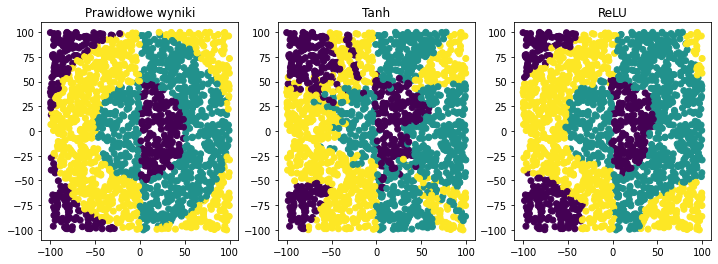

In [87]:
plt.figure(figsize=[12, 4])
plt.subplot(131)
plt.scatter(r3_x_test[:, 0], r3_x_test[:, 1], c=np.argmax(r3_y_test, axis=1))
plt.title('Prawidłowe wyniki')
plt.subplot(132)
plt.scatter(r3_x_test[:, 0], r3_x_test[:, 1], c=np.argmax(nn_tanh_r3.predict(r3_x_test), axis=1))
plt.title('Tanh')
plt.subplot(133)
plt.title('ReLU')
plt.scatter(r3_x_test[:, 0], r3_x_test[:, 1], c=np.argmax(nn_relu_r3.predict(r3_x_test), axis=1))
plt.show()

## Rings5-regular

In [88]:
r5_x_train, r5_y_train, r5_x_test, r5_y_test = read_classification_data('rings5-regular')

In [90]:
nn_tanh_r5 = NN(input_shape=r5_x_train.shape, neurons_num=[40, 40, 5],
        activations=[Tanh(), Tanh(), Softmax()])

nn_tanh_r5.fit(r5_x_train, r5_y_train, batch_size=4, n_epochs=400, learning_rate=0.0001, loss=cross_entropy, metric=f_score, x_test=r5_x_test, y_test=r5_y_test, verbose_step=10)

Epoch number 10/400
Loss on training set: 0.3955627368162784 f_score on training set: 0.5057759486268895, loss on test set: 0.46116451750543186 f_score on test set: 0.4030404283119971
Epoch number 20/400
Loss on training set: 0.36974509532998584 f_score on training set: 0.5040189089664666, loss on test set: 0.4534094123724164 f_score on test set: 0.3773929412289295
Epoch number 30/400
Loss on training set: 0.355578447213273 f_score on training set: 0.5462745636294847, loss on test set: 0.4376529507554107 f_score on test set: 0.41387446634041447
Epoch number 40/400
Loss on training set: 0.3603762232069123 f_score on training set: 0.5067433446243338, loss on test set: 0.45756249605908167 f_score on test set: 0.3631862471223203
Epoch number 50/400
Loss on training set: 0.3396375825934496 f_score on training set: 0.5469217274444917, loss on test set: 0.4210448767647061 f_score on test set: 0.3941801304068331
Epoch number 60/400
Loss on training set: 0.33272736534977854 f_score on training 

In [91]:
nn_relu_r5 = NN(input_shape=r5_x_train.shape, neurons_num=[40, 40, 5],
        activations=[ReLU(), ReLU(), Softmax()])

nn_relu_r5.fit(r5_x_train, r5_y_train, batch_size=4, n_epochs=400, learning_rate=0.0001, loss=cross_entropy, metric=f_score, x_test=r5_x_test, y_test=r5_y_test, verbose_step=10)
#nn_relu_r5.fit(r5_x_train, r5_y_train, batch_size=4, n_epochs=50, learning_rate=0.00005, loss=mse, metric=mse, x_test=r5_x_test, y_test=r5_y_test, verbose_step=10)

Epoch number 10/400
Loss on training set: 0.8025402254287953 f_score on training set: 0.49411102902025617, loss on test set: 1.1701534854652245 f_score on test set: 0.3820901124153191
Epoch number 20/400
Loss on training set: 0.42838551351187903 f_score on training set: 0.5495004791019877, loss on test set: 0.6065466633514327 f_score on test set: 0.42430966732666164
Epoch number 30/400
Loss on training set: 0.3728729286593688 f_score on training set: 0.5762436645227904, loss on test set: 0.43486212045838346 f_score on test set: 0.5098011409394977
Epoch number 40/400
Loss on training set: 0.29288952771016064 f_score on training set: 0.6093571702388971, loss on test set: 0.381031200854919 f_score on test set: 0.4688498927503635
Epoch number 50/400
Loss on training set: 0.2857171257366374 f_score on training set: 0.6279874794131918, loss on test set: 0.39723320986228045 f_score on test set: 0.49621512277503854
Epoch number 60/400
Loss on training set: 0.2602601531961681 f_score on trainin

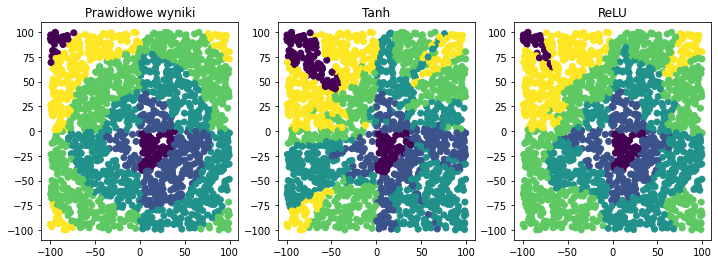

In [92]:
plt.figure(figsize=[12, 4])
plt.subplot(131)
plt.scatter(r5_x_test[:, 0], r5_x_test[:, 1], c=np.argmax(r5_y_test, axis=1))
plt.title('Prawidłowe wyniki')
plt.subplot(132)
plt.scatter(r5_x_test[:, 0], r5_x_test[:, 1], c=np.argmax(nn_tanh_r5.predict(r5_x_test), axis=1))
plt.title('Tanh')
plt.subplot(133)
plt.title('ReLU')
plt.scatter(r5_x_test[:, 0], r5_x_test[:, 1], c=np.argmax(nn_relu_r5.predict(r5_x_test), axis=1))
plt.show()